In [1]:
# Newton method with complex numbers

# This is totally inefficient and I do not care

In [2]:
import numpy as np, matplotlib.pylab as plt

# Initial conditions
n = 100
xmin = complex(-6, -6)
xmax = complex(6, 6)
tolerance = 1e-8
stepCount = 1
xreal = np.zeros(n*n)
ximag = np.zeros(n*n)

# Desired function
def f(z):
    return (z**2 - (1 + 3j)**2) * (z**2 - (5 + 1j)**2) * (z**2 - (3 - 2j)**2)

def df(z):
    return 6*(z**5) - (84 + 16j) * (z**3) + (40 - 96j) * z

#def absComplex(xreal, ximag):
    #x = complex(xreal, ximag)
    #return np.sqrt((x.real**2) + (x.imag**2))

# Determines whether x is within tolerance
# of the actual root.
def isInTolerance(xreal, ximag, tolerance):
    x = complex(xreal, ximag)
    #print(np.sqrt((x.real**2) + (x.imag**2)))
    return np.sqrt((f(x).real**2) + (f(x).imag**2)) <= tolerance

# Finds the next x value based on the current
def nextx (xreal, ximag):
    x = complex(xreal, ximag)
    #print(x)
    if df(x) != 0:
        return x - (f(x)/df(x))
    else:
        return x - (f(x)/((df(x))+tolerance))

In [3]:
# Determine initial x values to test
#dxreal = xmax.real - xmin.real / n
#dximag = xmax.imag - xmin.imag / n
#print("", xmax.real, "-", xmin.real, "/", n, "=", dxreal)
#print(dxreal)
#print(dximag)

dxreal = np.linspace(xmin.real, xmax.real, n)
dximag = np.linspace(xmin.imag, xmax.imag, n)


for i in range (0, n):
    for j in range (0, n):
        #xreal[n*i + j] = xmin.real + i*dxreal
        #ximag[n*i + j] = xmax.imag + j*dximag
        xreal[n*i + j] = dxreal[i]
        ximag[n*i + j] = dximag[j]

In [6]:
isUnique = True

for i in range (0, len(xreal)):
    stepCount = 1

    # Find new x lines until f(x) is within tolerance
    while (not isInTolerance(xreal[i], ximag[i], tolerance)):
        xcomplex = nextx(xreal[i], ximag[i])
        xreal[i] = xcomplex.real
        ximag[i] = xcomplex.imag
        stepCount += 1
    
    # If root has not been found print results
    if (xreal[i] < xmax.real and xreal[i] > xmin.real) and (ximag[i] < xmax.imag and ximag[i] > xmin.imag):
        isUnique = True
        for j in range(i):
            if (xreal[i] - xreal[j] <= tolerance) and (ximag[i] - ximag[j] <= tolerance):
                isUnique = False

        if isUnique or isUnique==False:
            print("Root is ", xreal[i], " + ", ximag[i], "i")
            print("Found root in ", stepCount, " steps.")
            print()

Root is  3.0  +  -2.0 i
Found root in  1  steps.

Root is  3.0000000000019282  +  -1.9999999999990723 i
Found root in  1  steps.

Root is  1.0  +  3.0 i
Found root in  1  steps.

Root is  1.0  +  3.0 i
Found root in  1  steps.

Root is  1.0  +  3.0 i
Found root in  1  steps.

Root is  -3.0000000000009472  +  2.000000000000203 i
Found root in  1  steps.

Root is  -3.0000000000000506  +  1.9999999999998175 i
Found root in  1  steps.

Root is  -2.9999999999999987  +  1.9999999999999967 i
Found root in  1  steps.

Root is  -3.0  +  2.0 i
Found root in  1  steps.

Root is  -2.9999999999999067  +  2.000000000000184 i
Found root in  1  steps.

Root is  -3.0  +  2.0 i
Found root in  1  steps.

Root is  5.000000000000002  +  0.9999999999999971 i
Found root in  1  steps.

Root is  1.0  +  3.0 i
Found root in  1  steps.

Root is  4.999999999999999  +  0.9999999999999974 i
Found root in  1  steps.

Root is  -0.9999999999999996  +  -2.9999999999999982 i
Found root in  1  steps.

Root is  -0.9999999

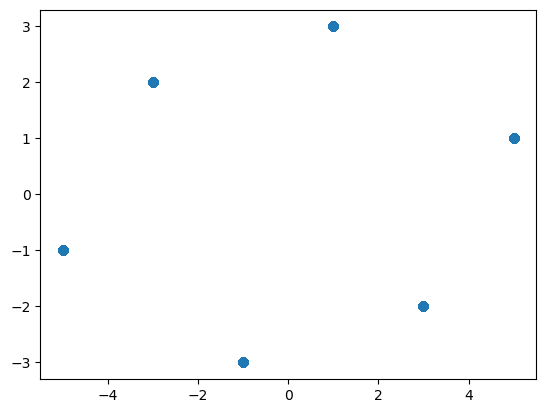

In [7]:
x, y = xreal, ximag
plt.scatter(x,y)

/Users/zilin/.conda/envs/lab/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


NameError: name 'x' is not defined

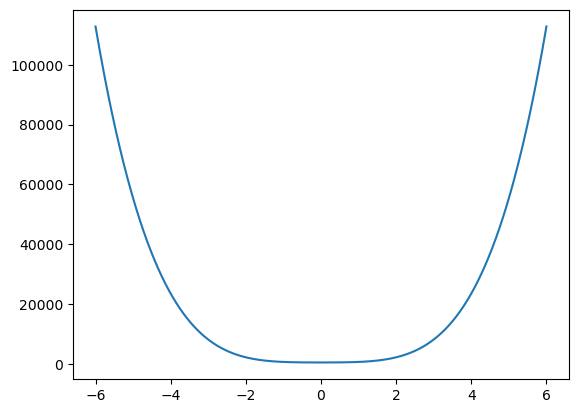

In [5]:
# Plot function and its roots

# Plot function
x_f = np.linspace(xmin, xmax, 1000)
y_f = f(x_f)
plt.plot(x_f, y_f)

# Plot roots
for i in range(0, len(x)):
    if not (abs(x[i] - x[i-1]) < tolerance): # plot unique roots
        plt.scatter(x[i], f(x[i]))
        
plt.show()